In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_csv('c://bd092_data//ozone.csv')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [5]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [7]:
#null 값 평균값으로 대체하기 
# ozone 평균 : 42.129 / solar.r 평균 : 185.93
df['Ozone'] = df['Ozone'].fillna(df['Ozone'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [8]:
#평균값에는 변동이 생겼을까? 
df.describe() #변동 없다. 

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,28.693372,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,21.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,42.129310,205.000000,9.700000,79.000000,7.000000,16.000000
75%,46.000000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [10]:
#solar.r null값도 평균값으로 채우자. 
df['Solar.R'] = df['Solar.R'].fillna(df['Solar.R'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [11]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,28.693372,87.960267,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,21.000000,120.000000,7.400000,72.000000,6.000000,8.000000
50%,42.129310,194.000000,9.700000,79.000000,7.000000,16.000000
75%,46.000000,256.000000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [15]:
#다중회귀분석 식 만들기
#x값과 y값 데이터 분리 
x = df[['Solar.R', 'Wind', 'Temp']]
y = df['Ozone']


0      41.00000
1      36.00000
2      12.00000
3      18.00000
4      42.12931
         ...   
148    30.00000
149    42.12931
150    14.00000
151    18.00000
152    20.00000
Name: Ozone, Length: 153, dtype: float64

In [17]:
#다중회귀분석 식 상수항 추가하기
x1 = sm.add_constant(x, has_constant='add')
x1 #다중회귀식 완성 

,const,Solar.R,Wind,Temp
0,1.0,190.000000,7.4,67
1,1.0,118.000000,8.0,72
2,1.0,149.000000,12.6,74
3,1.0,313.000000,11.5,62
4,1.0,185.931507,14.3,56
...,...,...,...,...
148,1.0,193.000000,6.9,70
149,1.0,145.000000,13.2,77
150,1.0,191.000000,14.3,75
151,1.0,131.000000,8.0,76


In [19]:
## 모델생성 및 학습하기 
model11 = sm.OLS(y, x1)
result = model11.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     45.85
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           4.73e-21
Time:                        17:24:20   Log-Likelihood:                -680.14
No. Observations:                 153   AIC:                             1368.
Df Residuals:                     149   BIC:                             1380.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.2232     18.883     -2.024      0.045     -75.537      -0.909
Solar.R        0.0577      0.020      2.883      0.005       0.018       0.097
Wind          -2.7173      0.543     -5.006      0.000      -3.790      -1.645
Temp           1.2413      0.209      5.937      0.000       0.828       1.654
==============================================================================
Omnibus:                       50.473   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.388
Skew:                           1.378   Prob(JB):                     1.61e-27
Kurtosis:                       6.429   Cond. No.                     2.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

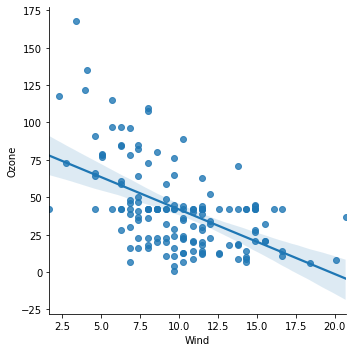

In [21]:
#회귀선 그리기 
# 시각화 라이브러리는 필요할때 불러주자. 용량이 크다. 
import seaborn as sns
sns.lmplot(y='Ozone', x='Wind', data=df) #x,y는 함수 안에 기본 값이다.

In [22]:
df.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.302970,-0.530936,0.608742,0.149081,-0.011355
Solar.R,0.302970,1.000000,-0.055245,0.262569,-0.072904,-0.145621
Wind,-0.530936,-0.055245,1.000000,-0.457988,-0.178293,0.027181
Temp,0.608742,0.262569,-0.457988,1.000000,0.420947,-0.130593
Month,0.149081,-0.072904,-0.178293,0.420947,1.000000,-0.007962
Day,-0.011355,-0.145621,0.027181,-0.130593,-0.007962,1.000000


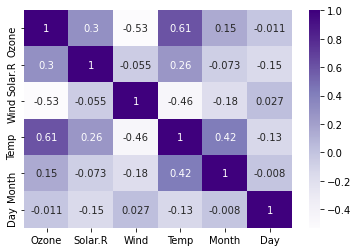

In [35]:
sns.heatmap(df.corr(), cmap='Purples', annot=True)

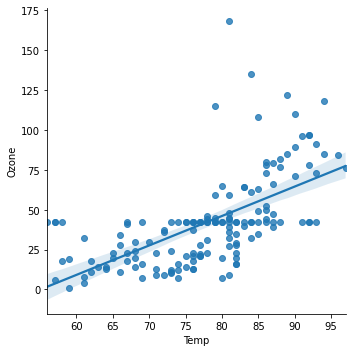

In [36]:
sns.lmplot(y='Ozone', x='Temp', data=df)